In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree regressor
tree = DecisionTreeRegressor()

# Train the decision tree regressor
reg = tree.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = reg.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.5053038081774709


Certainly! The intuition behind a decision tree regressor is to recursively partition the feature space into regions and assign a predicted value to each region based on the training data.

Here's a step-by-step explanation of the intuition behind decision tree regression:

Splitting the Feature Space: The decision tree regressor starts by considering the entire feature space, represented by the training data. It selects a feature and a threshold value that best divides the data into two subsets.

Minimizing the Loss: The decision to split the data is based on minimizing a loss function, usually the mean squared error (MSE) or another appropriate measure. The goal is to find the feature and threshold that create the best split, minimizing the overall error between the predicted values and the true values.

Recursive Partitioning: After the initial split, each subset is further divided using the same process. The algorithm selects the best feature and threshold value for each subset to create a new split. This process continues until a stopping criterion is met, such as reaching a maximum depth or a minimum number of samples in a leaf node.

Assigning Predicted Values: At each leaf node of the tree, the decision tree regressor assigns a predicted value to represent the target variable for the data points that fall into that region. This predicted value is typically the mean or median of the target variable values in that leaf node.

Making Predictions: To make predictions on new data points, the decision tree regressor traverses the tree from the root to a leaf node, following the decision rules defined by the splits. Once it reaches a leaf node, it assigns the predicted value associated with that leaf node as the predicted value for the new data point.

The decision tree regressor uses a hierarchical structure of binary splits to create a series of conditions that determine the predicted value for each region of the feature space. By partitioning the feature space based on the values of the features, the decision tree regressor can capture non-linear relationships between the features and the target variable.

The advantage of decision tree regression is its interpretability and ease of understanding. It can handle both numerical and categorical features, and it is robust to outliers. However, decision trees tend to overfit the training data, which can be mitigated by using techniques like pruning or ensemble methods.

## Decession Tree Regressor implementation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import fetch_california_housing
cal_df = fetch_california_housing()

In [6]:
print(cal_df.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [10]:
df = pd.DataFrame(cal_df.data, columns=cal_df.feature_names)
df["Target"] = cal_df.target
df=df.sample(frac=0.25)

In [11]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [12]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14818,1.9107,36.0,1.130435,0.608696,58.0,2.521739,32.68,-117.11
10633,6.3298,16.0,5.618492,0.985637,3785.0,3.397666,33.70,-117.79
3979,4.1154,28.0,5.455064,1.068474,1790.0,2.553495,34.19,-118.61
19517,1.9013,36.0,4.232906,1.083333,1998.0,4.269231,37.64,-121.01
11720,3.1193,21.0,20.033333,3.826667,385.0,2.566667,39.24,-120.11


In [13]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train , y_test = train_test_split(X,y, test_size=0.03, random_state=42)

In [14]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()

In [17]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [18]:
y_pred = regressor.predict(X_test)
y_pred

array([2.221  , 1.582  , 0.63   , 1.25   , 1.406  , 2.775  , 2.241  ,
       2.519  , 0.991  , 1.192  , 1.796  , 1.09   , 1.375  , 1.424  ,
       2.483  , 1.075  , 2.098  , 1.615  , 2.5    , 1.118  , 1.432  ,
       1.31   , 1.61   , 0.621  , 1.167  , 3.93   , 2.125  , 0.927  ,
       1.178  , 2.335  , 1.375  , 0.952  , 3.     , 1.32   , 0.588  ,
       2.024  , 2.138  , 2.646  , 0.598  , 2.034  , 0.675  , 2.045  ,
       0.962  , 1.561  , 1.261  , 0.92   , 1.769  , 1.503  , 1.734  ,
       1.875  , 1.672  , 5.00001, 2.386  , 3.1    , 3.216  , 2.793  ,
       0.828  , 1.464  , 2.523  , 2.146  , 5.00001, 4.676  , 2.4    ,
       2.819  , 3.392  , 1.784  , 0.418  , 1.579  , 1.288  , 5.00001,
       1.601  , 1.25   , 3.492  , 1.097  , 1.135  , 3.431  , 2.25   ,
       2.067  , 4.806  , 1.152  , 1.918  , 2.05   , 3.825  , 0.742  ,
       2.561  , 1.528  , 0.936  , 0.575  , 1.129  , 0.896  , 4.85   ,
       1.     , 3.357  , 3.34   , 5.00001, 0.886  , 0.778  , 1.172  ,
       3.021  , 3.51

In [19]:
from sklearn.metrics import r2_score
score = r2_score(y_pred, y_test)
score

0.6264377289357405

In [23]:
# Hyperparameter Tuning
# Define the hyperparameters and their possible values for tuning
parameters = {
    'max_depth': [None, 5, 10, 15],
    'splitter': ['best', 'random'],
    'max_features': ['auto','sqrt','log2'],
    'criterion': ['squared_error','friedman_mse','absolute_error', 'poisson']
}

regressor = DecisionTreeRegressor()

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
from sklearn.model_selection import GridSearchCV
regressorcv = GridSearchCV(regressor, param_grid=parameters, cv=2, scoring='neg_mean_squared_error')

In [26]:
regressorcv.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [None, 5, 10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [28]:
regressorcv.best_params_

{'criterion': 'absolute_error',
 'max_depth': 10,
 'max_features': 'auto',
 'splitter': 'best'}

In [ ]:
y_pred = regressorcv.predict(X_test)

In [29]:
r2_score(y_pred, y_test)

0.6264377289357405

In [30]:
regressor = DecisionTreeRegressor(criterion='absolute_error',max_depth=7, 
                      max_features='auto', splitter='best')

In [31]:

regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=7,
                      max_features='auto')

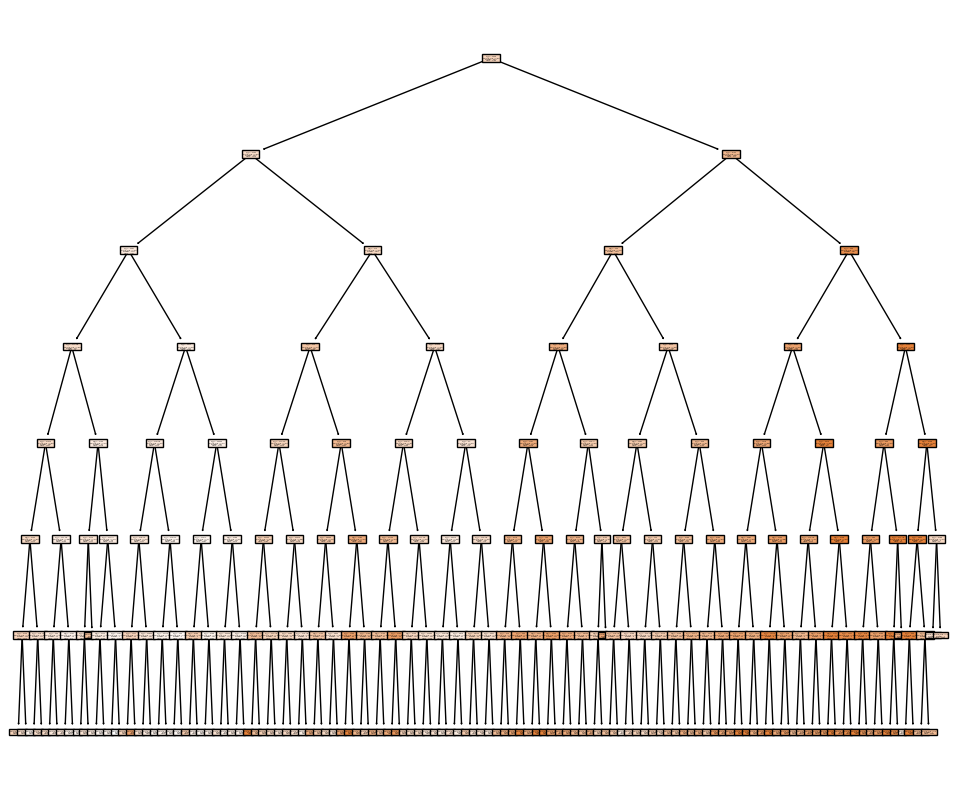

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(regressor, filled=True)
plt.show()